In [1]:
# Required Packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas_datareader.data as pdr
import math

from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates

# Progress Bar
from IPython.core.display import Image, display
import progressbar

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})

# plt setting
sns.set_style('whitegrid')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# The Market Analysis for Communication Services Sector


In this article, the **Communication Services Sector** from [Yahoo! Finance](https://finance.yahoo.com/) is used, and we analyze the current top tech companies' stock prices.

#### Table of contentens

* [Stock Prices Fluctuations](#Stock-Prices-Fluctuations)
* [The Moving Average of the Stocks](#The-Moving-Average-of-the-Stocks)
* [The Daily Return Average of a Stock](#The-Daily-Return-Average-of-a-Stock)
* [The Correlation Between Daily Returns of Different Stocks](#The-Correlation-Between-Daily-Returns-of-Different-Stocks)
* [Predicting Future Behaviors](#Predicting-Future-Behaviors)
    

| Symbol | Name | Symbol | Name |
|----------|------------------|---------|------------------|
| BTC-USD | Bitcoin USD | LTC-USD | Litecoin USD |
| ETH-USD | Ethereum USD | EOS-USD | EOS USD |
| XRP-USD | XRP USD | BNB-USD | Binance Coin USD |
| USDT-USD | Tether USD | XLM-USD | Stellar USD |
| BCH-USD | Bitcoin Cash USD | TRX-USD | TRON USD |

In [2]:
Stock_list = ['BTC-USD','ETH-USD','XRP-USD','USDT-USD','BCH-USD','LTC-USD','EOS-USD','BNB-USD','XLM-USD','TRX-USD']
Stock_Dic = {'BTC-USD':'Bitcoin USD', 'ETH-USD':'Ethereum USD','XRP-USD':'XRP USD','USDT-USD':'Tether USD',
            'BCH-USD':'Bitcoin Cash USD','LTC-USD':'Litecoin USD','EOS-USD':'EOS USD',
            'BNB-USD':'Binance Coin USD','XLM-USD':'Stellar USD','TRX-USD':'TRON USD'}

The data is collected from **a years ago until now**.

In [3]:
#start, end = [datetime(datetime.today().year-2, 1, 1), datetime.today()]
start, end = [datetime(datetime.today().year-1,datetime.today().month,datetime.today().day), datetime.today()]

In [4]:
def Timeline_plot(start, end, width = 16):
    fig, ax = plt.subplots(figsize=(width, 1))
    Temp = pd.date_range(start, datetime(end.year, end.month, 1), freq='MS')
    ax.plot((start, end), (0, 0), 'k', alpha=.5)
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=2))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    #fig.autofmt_xdate()
    _ = plt.setp((ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values())), visible=False)
    for i in Temp:
        ax.scatter(i, 0, s=30, facecolor='#e74c3c', edgecolor='k')
    ax.grid(False)
    _  = plt.xticks(rotation=90)
    Temp1 = Temp.min().replace(day=1) - timedelta(days=1)
    Temp2 = Temp.max().replace(day=1) + timedelta(days=31)
    _ = ax.set_xlim ([datetime(Temp1.year,Temp1.month, 1), datetime(Temp2.year,Temp2.month, 1)]) 

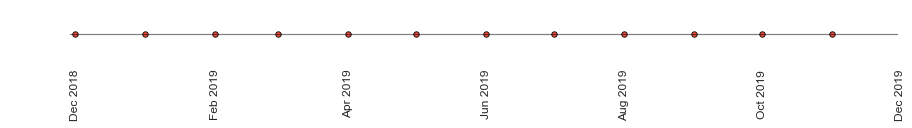

In [5]:
Timeline_plot(start, end)

Collecting data from **Yahoo Finance!**, and creating moving averages for **10**, **20** and **60** day periods of time.

In [6]:
def Get_Data(Inp):
    Days = [10, 20, 60]
    Out = pdr.DataReader(Inp, 'yahoo', start, end)
    Out.insert(0, 'Symbol', Inp) 
    for j in Days:
        column_name = "Moving Ave. %s days" % (str(j))
        Out[column_name] = Out['Adj Close'].rolling(window=j, center=False).mean()
    return Out

In [7]:
Data = Get_Data(Stock_list[0])

Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in Stock_list[1:]:
    Counter+=1
    Progress_Bar.update(Counter)
    Temp = Get_Data(i)
    Data = pd.concat([Data, Temp])
    del Temp
Progress_Bar.finish()

|#########################################################################|100%


Displaying today's data only:

In [8]:
Today = Data[Data.index == Data.index[-1]].reset_index(drop = True)
Today.style.hide_index()

In [9]:
print('Currently, the stock with the highest volume is %s' %
      Stock_Dic[Today[Today.Volume == Today.Volume.max()].Symbol.values[0]])

Currently, the stock with the highest volume is Tether USD


Consider **BTC-USD** for example. We have,

In [10]:
def Disp_Data(Inp, df = Data):
    Out = df[df.Symbol == Inp].drop(columns=['Symbol'])
    return Out

In [11]:
Temp = Disp_Data('BTC-USD')
Temp.describe()

High           Low          Open         Close        Volume  \
count    366.000000    366.000000    366.000000    366.000000  3.660000e+02   
mean    7229.264556   6903.637709   7064.848892   7074.967813  1.540286e+10   
std     2928.216737   2734.852053   2840.383284   2837.218732  7.939353e+09   
min     3275.377930   3191.303467   3236.274658   3236.761719  3.551764e+09   
25%     4042.995422   3909.618652   3966.937927   3963.131348  8.952641e+09   
50%     8039.661377   7577.345459   7823.267334   7823.127441  1.531399e+10   
75%     9786.763428   9402.840820   9542.402588   9545.576172  2.025618e+10   
max    13796.489258  12233.261719  13017.125000  13016.231445  4.510573e+10   

          Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
count    366.000000           357.000000           347.000000   
mean    7074.967813          7108.781117          7147.558139   
std     2837.218732          2824.762470          2805.469046   
min     3236.761719          3397.024365          3524.744824   
25%     3963.131348          3917.331714          3907.251862   
50%     7823.127441          7987.073779          8176.510938   
75%     9545.576172          9859.415820         10084.838330   
max    13016.231445         11700.549609         11598.380176   

       Moving Ave. 60 days  
count           307.000000  
mean           7271.935631  
std            2721.740089  
min            3670.185925  
25%            4178.610687  
50%            8304.339469  
75%            9877.745809  
max           10906.779476

In [12]:
Temp.head().dropna(axis = 1)

High          Low         Open        Close      Volume  \
Date                                                                         
2018-11-29  4413.020508  4145.765137  4269.004395  4278.846680  6503347767   
2018-11-30  4322.976562  3942.822021  4289.088867  4017.268555  6048016716   
2018-12-01  4309.377441  3969.710693  4024.464355  4214.671875  5375314093   
2018-12-02  4301.519531  4110.978516  4200.733398  4139.877930  5262697895   
2018-12-03  4155.979492  3840.446289  4147.323730  3894.130859  5089570993   

              Adj Close  
Date                     
2018-11-29  4278.846680  
2018-11-30  4017.268555  
2018-12-01  4214.671875  
2018-12-02  4139.877930  
2018-12-03  3894.130859

In [13]:
Temp.tail()

High          Low         Open        Close       Volume  \
Date                                                                          
2019-11-25  7319.856934  6617.166992  7039.977051  7146.133789  42685231261   
2019-11-26  7320.230469  7098.572266  7145.159180  7218.371094  21129505542   
2019-11-27  7619.693359  6974.174316  7220.880859  7531.663574  23991412764   
2019-11-28  7730.072754  7454.121582  7536.820312  7463.105957  19050116751   
2019-11-29  7778.267090  7465.061523  7468.820801  7770.351074  20099608576   

              Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
Date                                                                
2019-11-25  7146.133789          7820.261133          8354.342090   
2019-11-26  7218.371094          7687.022168          8247.216650   
2019-11-27  7531.663574          7582.390967          8160.421753   
2019-11-28  7463.105957          7497.772949          8093.333008   
2019-11-29  7770.351074          7454.193506          8041.171460   

            Moving Ave. 60 days  
Date                             
2019-11-25          8455.479614  
2019-11-26          8438.255037  
2019-11-27          8426.350846  
2019-11-28          8415.666187  
2019-11-29          8406.940902

# Stock Prices Fluctuations

Let's plot the stocks adjusted the closing price for all stock data under study.

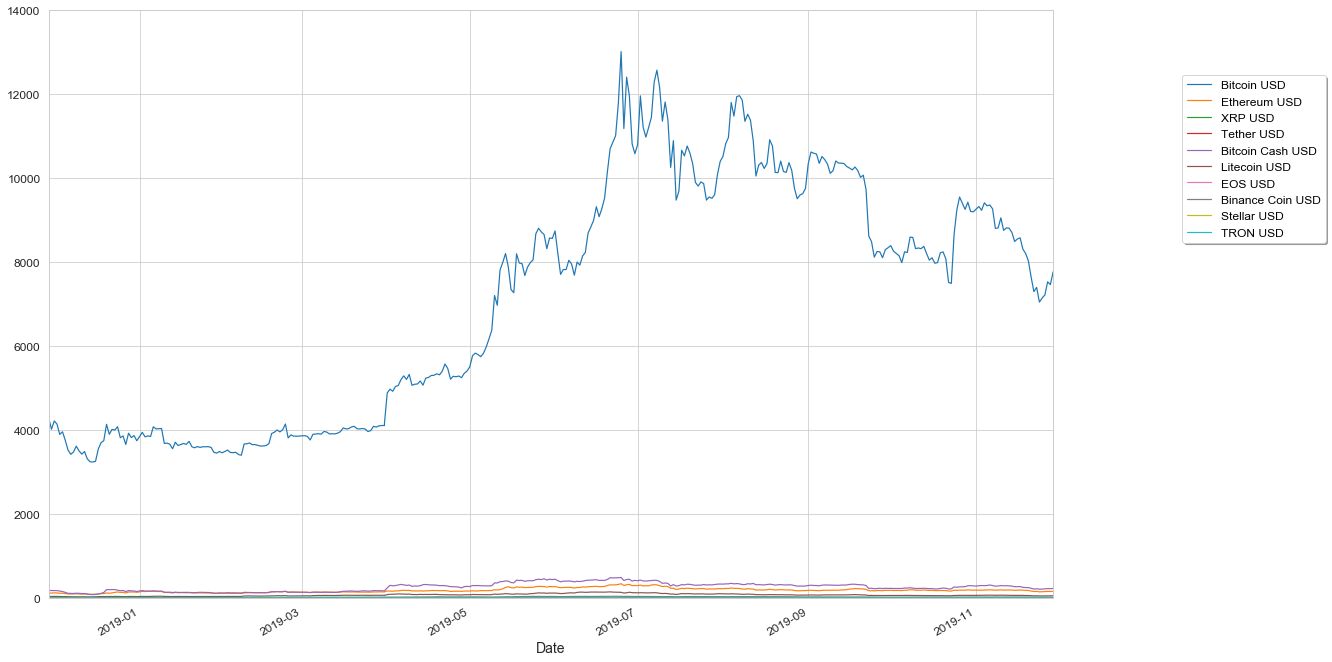

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 12))
for i in range(len(Stock_list)):
    Data[Data.Symbol == Stock_list[i]]['Adj Close'].plot(ax=ax, label=Stock_Dic[Stock_list[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)
_, Temp = ax.get_ylim()
_ = ax.set_ylim([0, int(np.float(format(Temp, '.1e')))])

We can create some new functions that can be beneficial for applications as well.

In [15]:
def List_Search(Inp, key):
    # Inp: A list
    Out=list()
    for i in range(len(Inp)):
        if Inp[i].find(key) != -1:
            Out.append(Inp[i])
    return Out

def List_Diff(Inp_A, Inp_B):
    # Inp_A: A list
    # Inp_B: A list
    Out=list(set(Inp_A)-set(Inp_B))
    return Out

In [16]:
# Creating a new list of Columns
Columns = List_Diff(Data.columns.tolist(), List_Search(Data.columns.tolist(), 'Moving Ave'))
Columns = List_Diff(Columns, ['Symbol'])
Temp = ['Ave ' + i for i in Columns]

# A new DataFrame
Ave_df = pd.DataFrame({'Symbol':Stock_list})
for i in Temp:
    Ave_df[i]=''
del Temp
# Progress Bar    
Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in range(len(Stock_list)):
    Counter+=1
    Progress_Bar.update(Counter)
    Ave_df.iloc[i,1:] = Data[Data.Symbol == Stock_list[i]][Columns].mean().values
               
Progress_Bar.finish()

|#########################################################################|100%


The following table shows the average values for all columns of the Data.

In [17]:
Ave_df.style.hide_index()

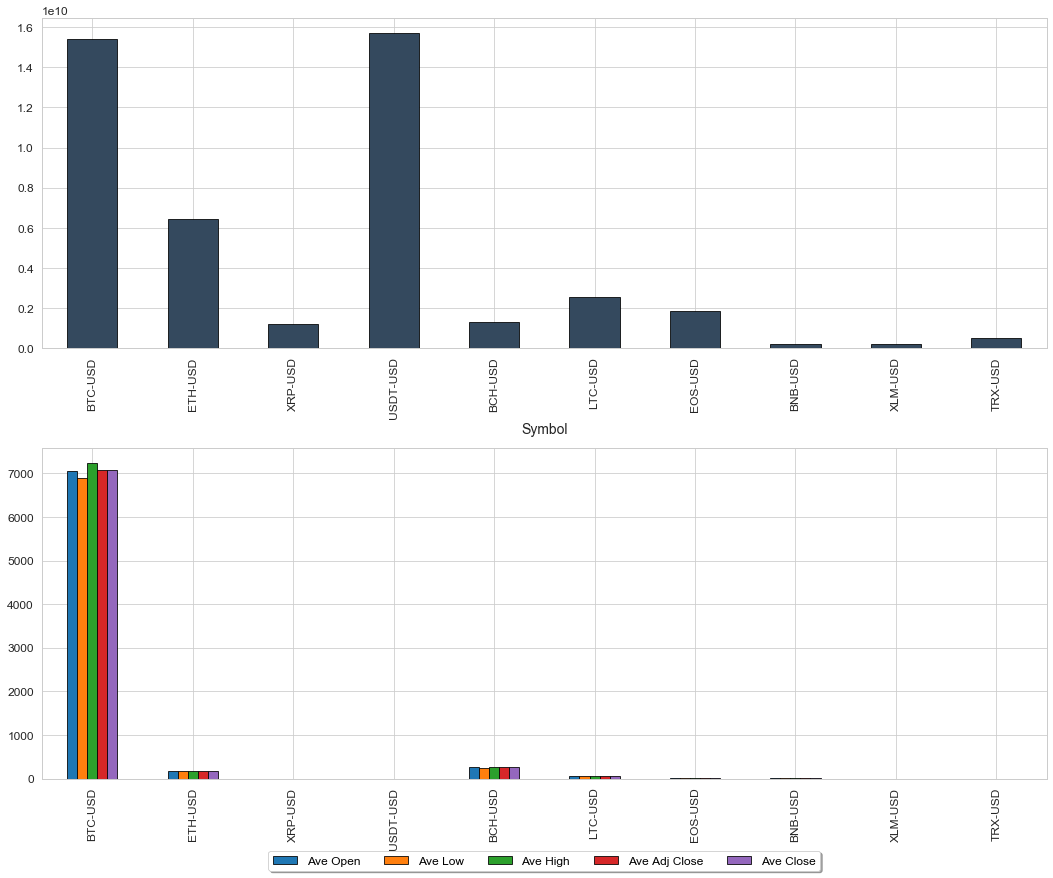

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 14), sharex=False)
# Upper Plot
Ave_df.plot.bar(x='Symbol', y='Ave Volume', rot=90,ax=ax[0], legend=False ,color='#34495e', edgecolor='k')
# Lower Plot
Temp = Ave_df.drop(columns=['Ave Volume'])
Temp.plot.bar(x='Symbol', rot=90,ax=ax[1], legend=True, edgecolor='k')
_ = ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=len(Temp.columns)-1, fontsize=12)
# Plot setting
plt.subplots_adjust(hspace=0.3,wspace=0.2)

# The Moving Average of the Stocks

Let's plot moving averages for 10, 20 and 60 day periods of time for the top **4** companies with the highest volume on average.

In [19]:
def TopN_volumes(N, df = Ave_df):
    Out = df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()
    return Out 

# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = TopN_volumes(N)

In [20]:
# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = Ave_df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()

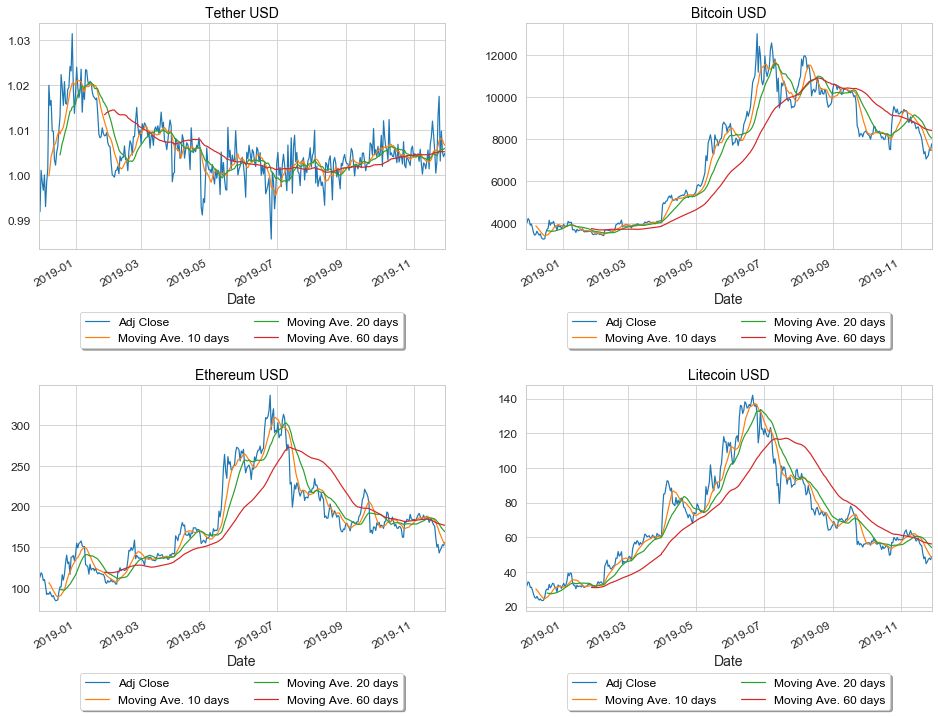

In [21]:
fig, ax = plt.subplots(nrows = math.ceil(N/2), ncols = 2, figsize=(16, 6*math.ceil(N/2)))

Counter = 0
for i in range(math.ceil(N/2)):
    for j in range(2):
        Disp_Data(mylist[Counter])[Columns].plot(ax=ax[i,j], legend = True)
        _ = ax[i,j].set_title(Stock_Dic[mylist[Counter]])
        _ = ax[i,j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=2, fontsize=12)
        Counter += 1
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# The Daily Return Average of a Stock

Daily return  can be calculated using the percentage change of the adjusted closing price.

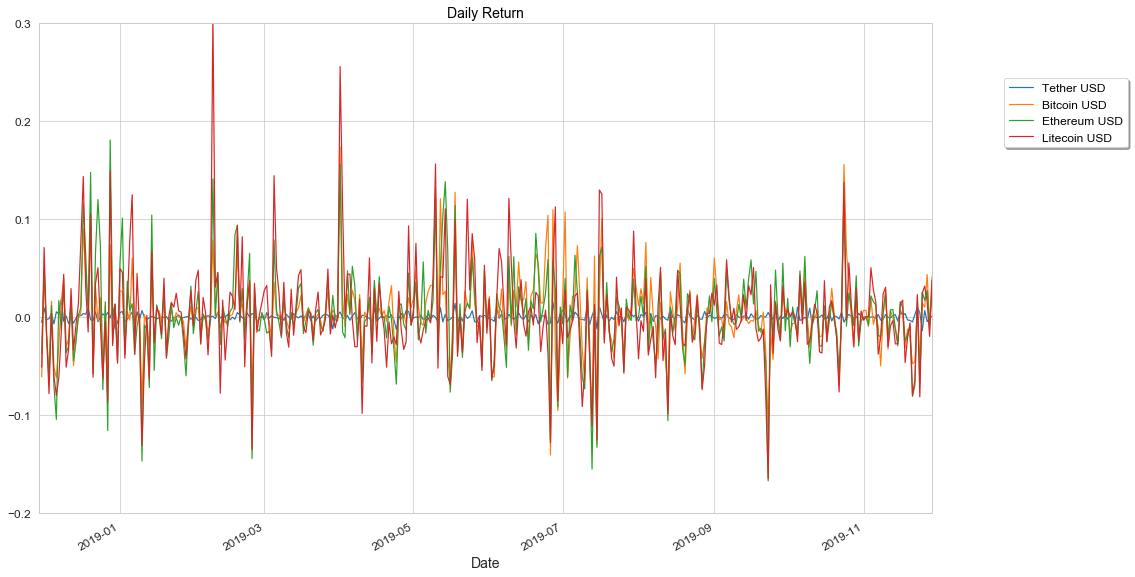

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
for i in range(len(mylist)):
    Disp_Data(mylist[i])['Adj Close'].pct_change().plot(ax=ax, label=Stock_Dic[mylist[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.9), shadow=True, ncol=1, fontsize=12)
Temp = ax.get_ylim()
_ = ax.set_ylim([np.float(format(Temp[0], '.0e')) ,np.float(format(Temp[1], '.0e'))])
_ = ax.set_title('Daily Return', fontsize=14)

## The Correlation Between Daily Returns of Different Stocks

First, we need to create a new data frame by reading the **Adj Close** column from all stock data under study. We have,

In [23]:
All_data = pdr.DataReader(Stock_list, 'yahoo', start, end)['Adj Close']

In [24]:
All_data.head()

Symbols         BTC-USD     ETH-USD   XRP-USD  USDT-USD     BCH-USD  \
Date                                                                  
2018-11-29  4278.846680  117.542648  0.379562  0.997377  180.983429   
2018-11-30  4017.268555  113.171425  0.362455  0.991823  173.066895   
2018-12-01  4214.671875  118.635559  0.372906  1.001052  172.123306   
2018-12-02  4139.877930  116.388901  0.367627  0.998372  172.113403   
2018-12-03  3894.130859  108.925018  0.348754  0.996594  159.818253   

Symbols       LTC-USD   EOS-USD   BNB-USD   XLM-USD   TRX-USD  
Date                                                           
2018-11-29  33.797447  3.021850  5.346633  0.165080  0.015695  
2018-11-30  32.064762  2.882900  5.078572  0.158630  0.014390  
2018-12-01  34.340736  2.957248  5.288723  0.166332  0.015184  
2018-12-02  33.713150  2.849377  5.250417  0.160301  0.014935  
2018-12-03  31.072802  2.593590  5.109251  0.149536  0.013868

In [25]:
All_data.tail()

Symbols         BTC-USD     ETH-USD   XRP-USD  USDT-USD     BCH-USD  \
Date                                                                  
2019-11-25  7146.133789  146.476532  0.218622  1.003114  209.235123   
2019-11-26  7218.371094  148.965073  0.222145  1.009773  212.933975   
2019-11-27  7531.663574  153.010559  0.225081  1.005027  220.414047   
2019-11-28  7463.105957  151.717575  0.224570  1.004080  218.737946   
2019-11-29  7770.351074  155.835342  0.230056  1.004797  225.147217   

Symbols       LTC-USD   EOS-USD    BNB-USD   XLM-USD   TRX-USD  
Date                                                            
2019-11-25  45.830338  2.535711  15.267364  0.057595  0.014292  
2019-11-26  47.273342  2.632595  15.527255  0.058553  0.015417  
2019-11-27  48.008808  2.688043  16.098288  0.059057  0.016149  
2019-11-28  47.056950  2.636087  15.683207  0.058225  0.015878  
2019-11-29  48.830853  2.799927  16.264021  0.060034  0.016224

The returns can be analyzed using the percentage change from the **adj Close**.

In [26]:
All_returns = All_data.pct_change()

In [27]:
All_returns.tail()

Symbols      BTC-USD   ETH-USD   XRP-USD  USDT-USD   BCH-USD   LTC-USD  \
Date                                                                     
2019-11-25  0.013936  0.025497 -0.020444 -0.014157  0.019919  0.024503   
2019-11-26  0.010109  0.016989  0.016116  0.006638  0.017678  0.031486   
2019-11-27  0.043402  0.027157  0.013216 -0.004700  0.035129  0.015558   
2019-11-28 -0.009103 -0.008450 -0.002271 -0.000942 -0.007604 -0.019827   
2019-11-29  0.041169  0.027141  0.024430  0.000714  0.029301  0.037697   

Symbols      EOS-USD   BNB-USD   XLM-USD   TRX-USD  
Date                                                
2019-11-25  0.034835 -0.000746  0.012550  0.025982  
2019-11-26  0.038208  0.017023  0.016629  0.078667  
2019-11-27  0.021062  0.036776  0.008610  0.047535  
2019-11-28 -0.019329 -0.025784 -0.014097 -0.016809  
2019-11-29  0.062153  0.037034  0.031069  0.021774

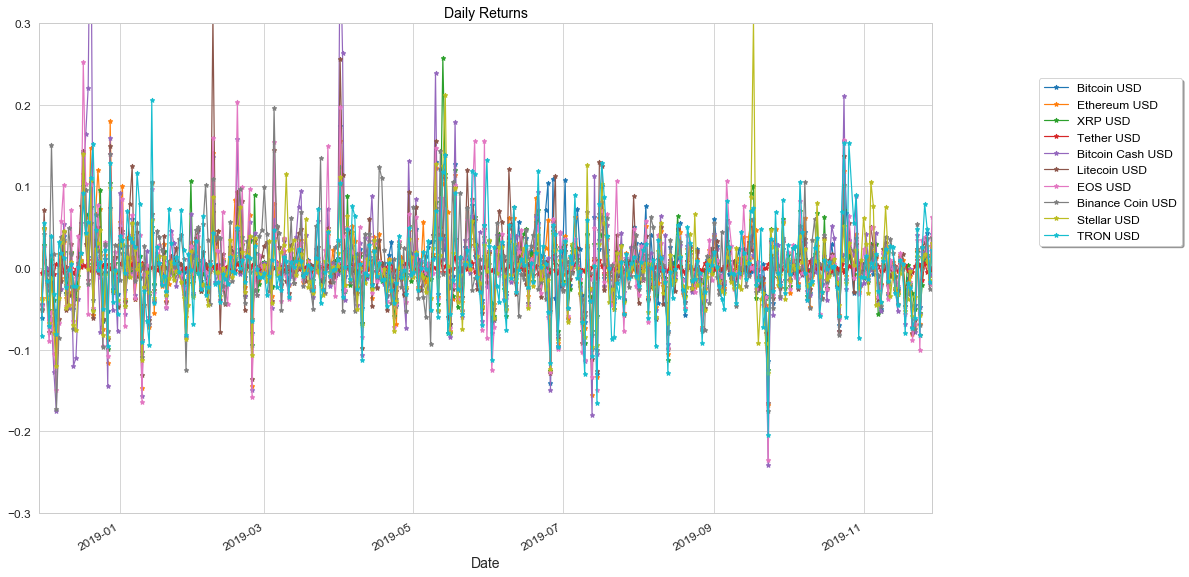

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
All_returns.plot(marker='*', legend=True, ax=ax)
_ = ax.set_ylim([-0.3 , 0.3])
_ = ax.set_title('Daily Returns', fontsize=14)
_ = ax.legend(Stock_Dic.values(), loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)

The following graphs show the correlation between different stocks.

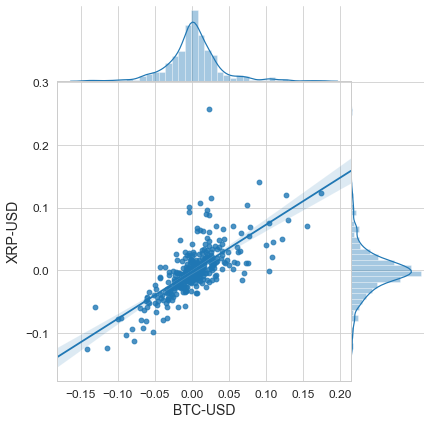

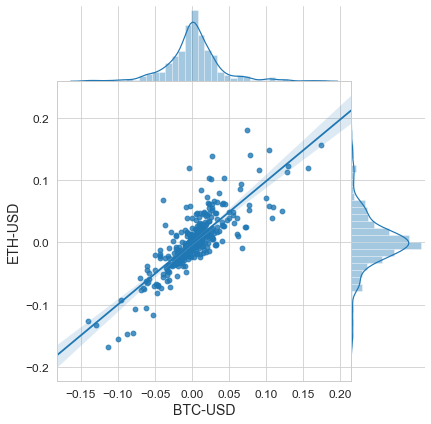

In [29]:
_ = sns.jointplot('BTC-USD','XRP-USD', All_returns, kind='reg', space=0, size=6, ratio=4)
_ = sns.jointplot('BTC-USD','ETH-USD', All_returns, kind='reg', space=0, size=6, ratio=4)

Now, we can use the *pairplot* tool to visualize all.

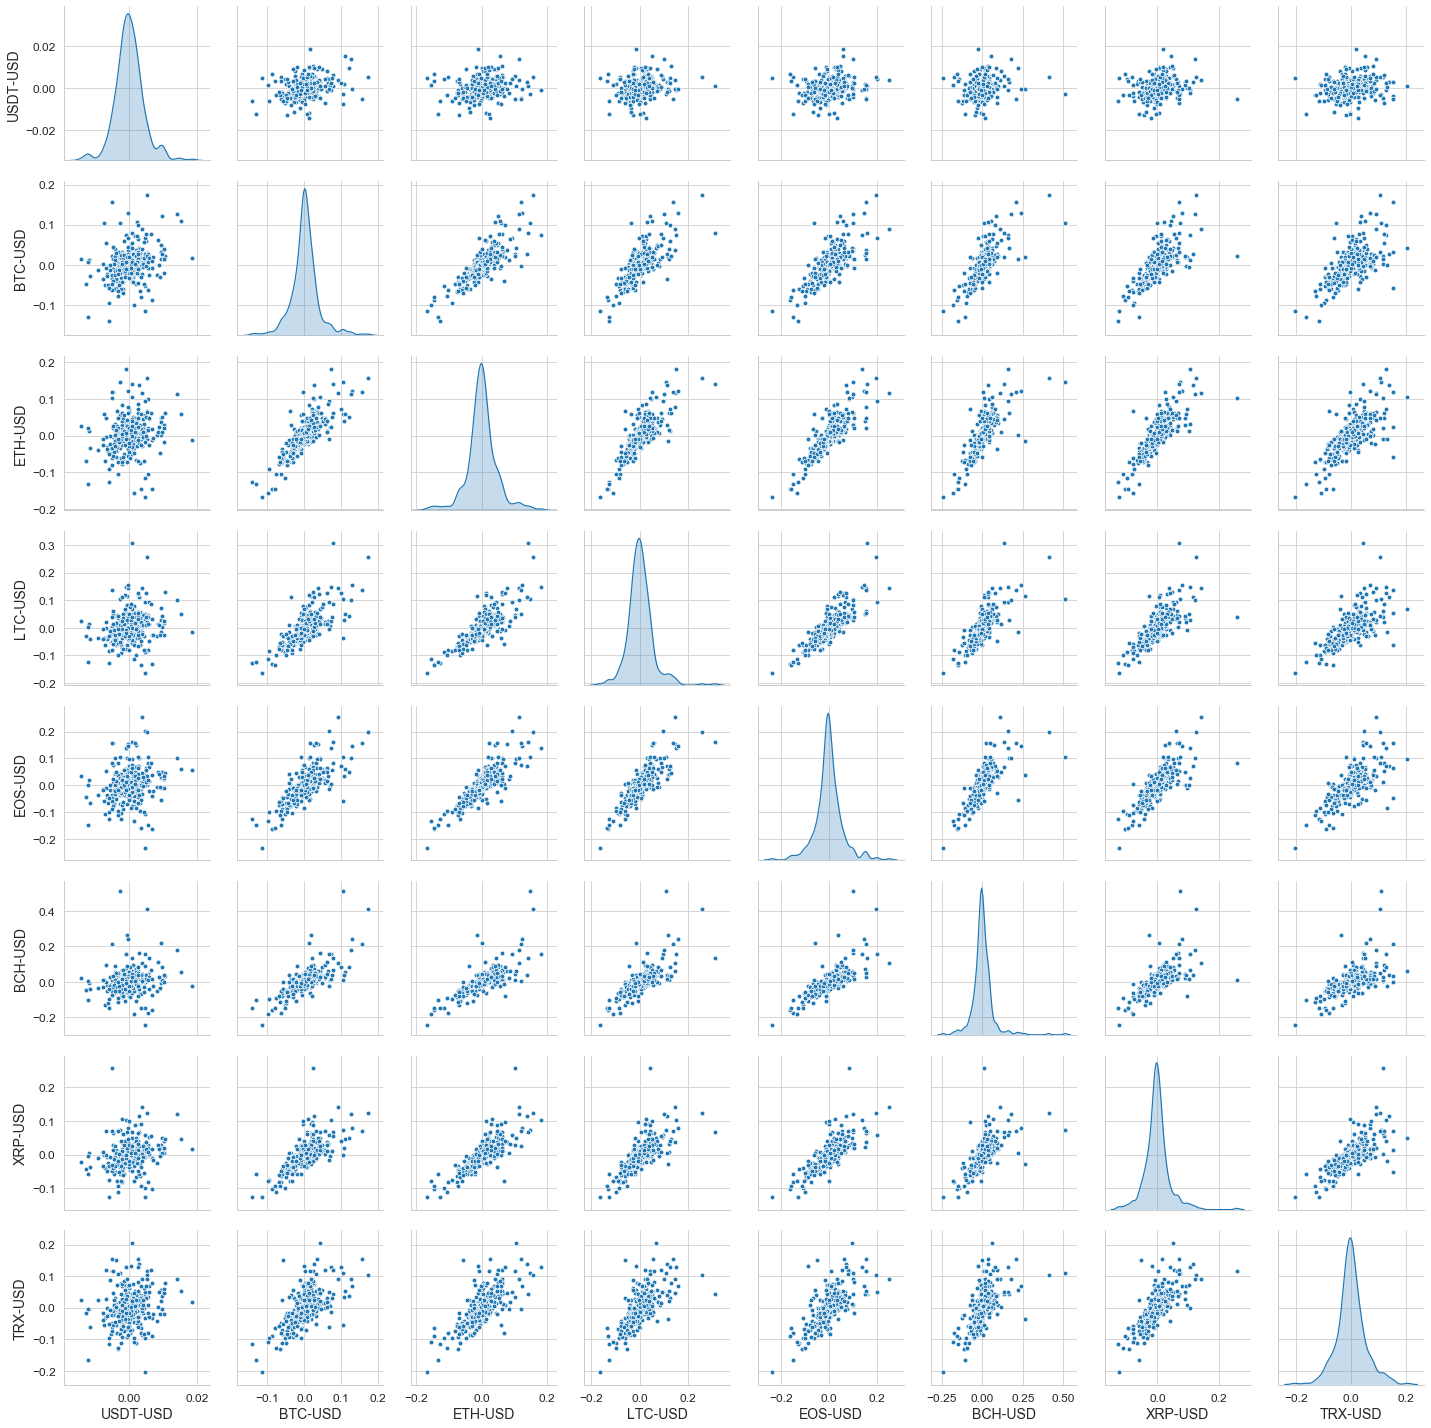

In [30]:
# Remove missing values
Temp = TopN_volumes(8, df = Ave_df)
Temp = All_returns[Temp].dropna()
# plot
_ = sns.pairplot(Temp, diag_kind='kde')

Nonetheless, the correlation matrix and plot are always convenient to see numerical values for correlations.

In [31]:
# Correlation Matrix
Cor_matrix = Temp.corr()
Cor_matrix

Symbols   USDT-USD   BTC-USD   ETH-USD   LTC-USD   EOS-USD   BCH-USD  \
Symbols                                                                
USDT-USD  1.000000  0.293423  0.200283  0.196921  0.199200  0.162759   
BTC-USD   0.293423  1.000000  0.820335  0.744735  0.747588  0.749433   
ETH-USD   0.200283  0.820335  1.000000  0.818300  0.846783  0.757169   
LTC-USD   0.196921  0.744735  0.818300  1.000000  0.836307  0.741992   
EOS-USD   0.199200  0.747588  0.846783  0.836307  1.000000  0.739103   
BCH-USD   0.162759  0.749433  0.757169  0.741992  0.739103  1.000000   
XRP-USD   0.222280  0.713839  0.812944  0.729247  0.773760  0.658878   
TRX-USD   0.188680  0.627390  0.727163  0.663114  0.692698  0.609614   

Symbols    XRP-USD   TRX-USD  
Symbols                       
USDT-USD  0.222280  0.188680  
BTC-USD   0.713839  0.627390  
ETH-USD   0.812944  0.727163  
LTC-USD   0.729247  0.663114  
EOS-USD   0.773760  0.692698  
BCH-USD   0.658878  0.609614  
XRP-USD   1.000000  0.719090  
TRX-USD   0.719090  1.000000

In [32]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    _ = ax.set_ylim(bottom + 0.5, top - 0.5)

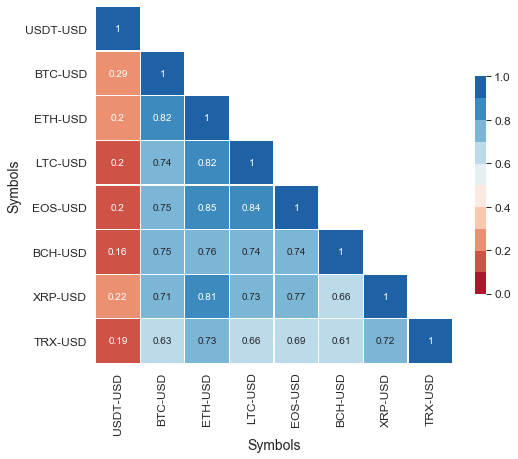

In [33]:
Correlation_Plot (Temp, 8)

Here, darker shades of blue represent a higher correlation.

In [34]:
def Risk_Plot(data):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 6))
    _ = ax.scatter(data.mean(), data.std(), s=25, color = "#e74c3c")
    _ = ax.set_xlabel('Expected Return')
    _ = ax.set_ylabel('Risk')
    for label,x,y in zip(data.columns, data.mean(), data.std()):
        plt.annotate(label, xy=(x,y), xytext=(-50,0), textcoords = 'offset points',
                     ha = 'right', va = 'bottom', arrowprops=dict(facecolor="#9b59b6", shrink=0.001))
    plt.autoscale(enable=True, axis='both', tight=True)
    return ax.get_xlim()

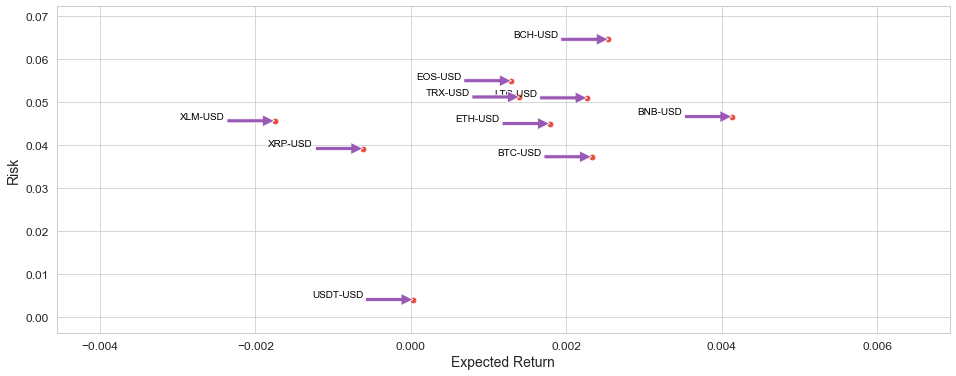

In [35]:
Temp = Risk_Plot(All_returns)

In [36]:
print("""The current trend seems to output a value between %.2e and %.2e.
We would like to identify a stock with high return and low risk!
""" % Temp)

The current trend seems to output a value between -4.55e-03 and 6.93e-03.
We would like to identify a stock with high return and low risk!



Let's find the [quantile](https://en.wikipedia.org/wiki/Quantile) for a stock.

In [37]:
qt = All_returns['BTC-USD'].quantile(0.05)
qt_pct = abs(All_returns['BTC-USD'].quantile(0.05))*100
print('Quantile Percentage: %0.4f' % qt_pct)

Quantile Percentage: 5.7976


In [38]:
print("""The 0.05 empirical quantile of daily returns is at {0:.2f}%.
      This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment)."""
      .format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.06%.
      This means that with 95% confidence, the worst daily loss will not exceed -0.06% (of the investment).


# Predicting Future Behaviors

To predict future behaviors, we can implement the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (also see this [link](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/variance-and-standard-deviation) and this [link](https://www.investopedia.com/terms/m/montecarlosimulation.asp)).

In [39]:
# consider a year
days = 365
# Delta t
dt = 1/365

Defining a Monte Carlo function fo the Stock price.

In [40]:
def stock_monte_carlo(start_price, days, mu, sigma):
    '''Function takes in stock price, number of days to run, mean and standard deviation values'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):       
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))        
        drift[x] = mu * dt
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [41]:
def Monte_Carlo_Analysis(Inp, mu, sigma, N=1e2, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Ouput Figure
    N = int(N)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    for run in range(100):
        _ = plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
        _ = ax.set_xlabel('Days')
        _ = ax.set_ylabel('Price')
        _ = ax.set_title('Monte Carlo Analysis for %s' % Stock_Dic[Inp])
    _ = ax.set_xlim([0,days])
    return df

In [42]:
def Final_price_distribution_simulations(Inp, mu, sigma, N= 1e4, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Simulations array
    N = int(N)
    simulations = np.zeros(N)
    # Progress Bar    
    Counter = 0
    Progress_Bar = progressbar.ProgressBar(maxval= N, widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
    Progress_Bar.start()

    for i in range(N):
        simulations[i] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
        Counter+=1
        Progress_Bar.update(Counter)
    Progress_Bar.finish()
    return simulations

In [43]:
def Final_price_distribution_plot(simulations, Inp):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Output Figure
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    q = np.percentile(simulations, 1)
    _ = ax.hist(simulations, bins='auto', color = '#34495e')
    _ = plt.figtext(0.75, 0.80, "Start price: $%.2f" % start_price, fontsize = 12)
    _ = plt.figtext(0.75, 0.75, "Mean final price: $%.2f" % simulations.mean(), fontsize = 12)
    _ = plt.figtext(0.75, 0.70, "VaR(0.99): $%.2f" % (start_price -q,), fontsize = 12)
    _ = plt.figtext(0.15,0.665, "q(0.99): $%.2f" % q, fontsize = 12)
    _ = ax.set_xlim()
    _ = ax.axvline(x=q, linewidth=4, color='#e74c3c')
    _ = ax.set_title("Final price distribution for %s after %s days" % (Stock_Dic[Inp], days), weight='bold')

### Bitcoin USD

High          Low         Open        Close       Volume  \
Date                                                                          
2018-11-29  4413.020508  4145.765137  4269.004395  4278.846680   6503347767   
2018-11-30  4322.976562  3942.822021  4289.088867  4017.268555   6048016716   
2018-12-01  4309.377441  3969.710693  4024.464355  4214.671875   5375314093   
2018-12-02  4301.519531  4110.978516  4200.733398  4139.877930   5262697895   
2018-12-03  4155.979492  3840.446289  4147.323730  3894.130859   5089570993   
...                 ...          ...          ...          ...          ...   
2019-11-25  7319.856934  6617.166992  7039.977051  7146.133789  42685231261   
2019-11-26  7320.230469  7098.572266  7145.159180  7218.371094  21129505542   
2019-11-27  7619.693359  6974.174316  7220.880859  7531.663574  23991412764   
2019-11-28  7730.072754  7454.121582  7536.820312  7463.105957  19050116751   
2019-11-29  7778.267090  7465.061523  7468.820801  7770.351074  20099608576   

              Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
Date                                                                
2018-11-29  4278.846680                  NaN                  NaN   
2018-11-30  4017.268555                  NaN                  NaN   
2018-12-01  4214.671875                  NaN                  NaN   
2018-12-02  4139.877930                  NaN                  NaN   
2018-12-03  3894.130859                  NaN                  NaN   
...                 ...                  ...                  ...   
2019-11-25  7146.133789          7820.261133          8354.342090   
2019-11-26  7218.371094          7687.022168          8247.216650   
2019-11-27  7531.663574          7582.390967          8160.421753   
2019-11-28  7463.105957          7497.772949          8093.333008   
2019-11-29  7770.351074          7454.193506          8041.171460   

            Moving Ave. 60 days  
Date                             
2018-11-29                  NaN  
2018-11-30                  NaN  
2018-12-01                  NaN  
2018-12-02                  NaN  
2018-12-03                  NaN  
...                         ...  
2019-11-25          8455.479614  
2019-11-26          8438.255037  
2019-11-27          8426.350846  
2019-11-28          8415.666187  
2019-11-29          8406.940902  

[366 rows x 9 columns]

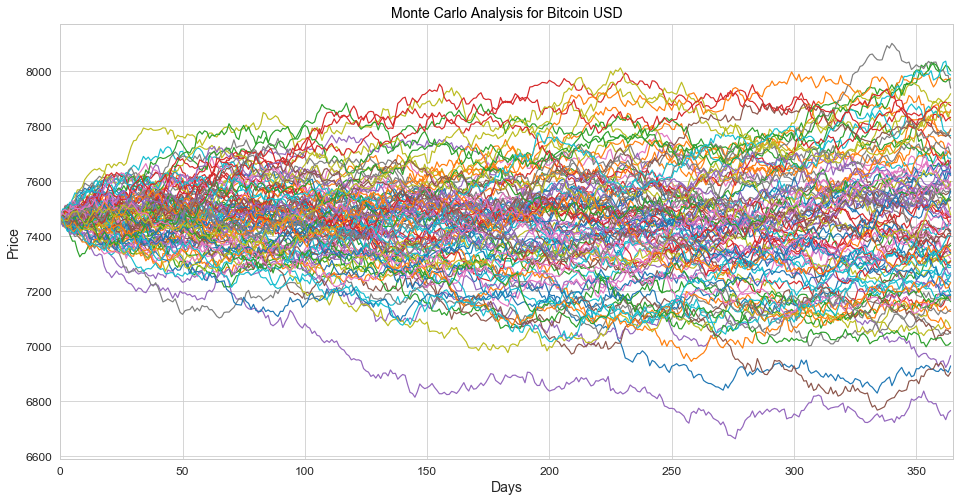

In [44]:
Stock = 'BTC-USD'
# mean
mu = All_returns.mean()[Stock]
# standard deviation
sigma = All_returns.std()[Stock]
# Analysis
Monte_Carlo_Analysis(Stock, mu = mu, sigma = sigma)

The frequencies of different outcomes simulated form a [**Bell curve**](https://www.investopedia.com/terms/b/bell-curve.asp). The most likely return is in the middle of the curve. This means there is an equal chance that the actual return will be higher or lower than that value.

In [45]:
Simulations = Final_price_distribution_simulations(Stock,  mu = mu, sigma = sigma)

|#########################################################################|100%


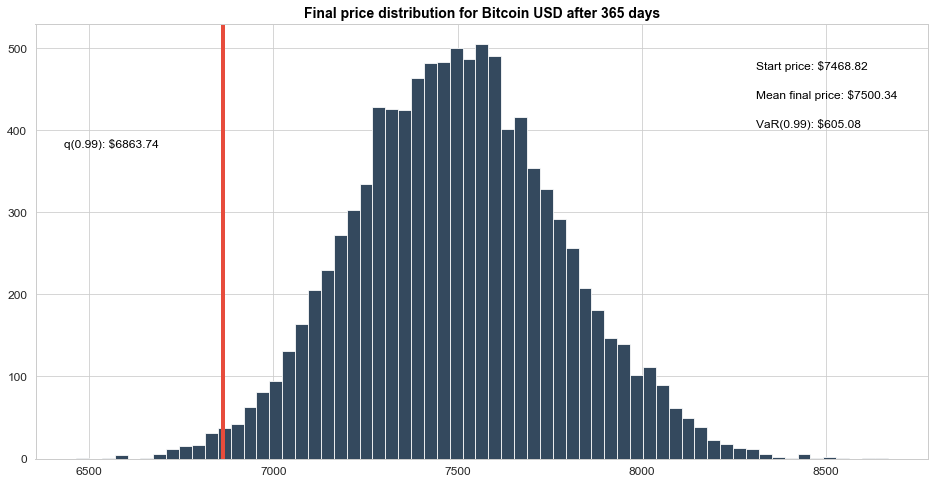

In [46]:
Final_price_distribution_plot(Simulations, Stock)

See more details about **Value at Risk (VaR)** [here](https://www.investopedia.com/articles/04/092904.asp).

***